# Behavioural analysis

## Preparing the data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [6]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-tXbv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
ds = pd.DataFrame()
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
for subjDir in allSubjDirs:
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    ds = ds.append(pd.read_csv(subjFilePath))
print ds.shape
print ds.columns

(80, 45)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat',
       u'fovGap', u'fovFade', u'periGap', u'periFade', u'szRelL', u'szRelR',
       u'offX', u'offY', u'tOffL', u'tOffR', u'trialT', u'nFrames', u'nNa',
       u'nf000', u'nf090', u'nf180', u'nf270', u'pd000', u'pd090', u'pd180',
       u'pd270', u'qnResp', u'ringSz'],
      dtype='object')


Transforming the data set first.

In [7]:
# dealing with the incompatibility of the first data set's sizes:
#ds.ix[ds.trialT==1,'ringSz'] = ds.ix[ds.trialT==1,'ringSz'] * 192 / 258
#ds.ix[ds.ringSz==258,'ringSz'] = 192
# converting sizes to deg:
ds['stimSz'] = np.round((ds.periGap*2+32)/35,1)
ds['ringSzDeg'] = np.round((ds.ringSz+32)/35,1)
ds['ringSzP'] = np.round(ds.ringSzDeg/ds.stimSz,2)
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

         expName             time  participant  session  trialN  dirL  dirR  \
0  mcEcc_ct-tXbv  2016-12-13_1222            0        1       1     0     0   
1  mcEcc_ct-tXbv  2016-12-13_1222            0        1       2     0     0   
2  mcEcc_ct-tXbv  2016-12-13_1222            0        1       3     0     0   
3  mcEcc_ct-tXbv  2016-12-13_1222            0        1       4     0     0   
4  mcEcc_ct-tXbv  2016-12-13_1222            0        1       5     0     0   

   vL  vR  szL   ...    nf270  pd000     pd090  pd180     pd270  qnResp  \
0   0   0  256   ...        1    0.0  0.000000    0.0  0.003333       0   
1   0   0  256   ...        1    0.0  0.000000    0.0  0.016667       0   
2   0   0  256   ...        1    0.0  0.000000    0.0  0.016667       0   
3   0   0  256   ...        0    0.0  0.008333    0.0  0.000000       0   
4   0   0  256   ...        0    0.0  0.005556    0.0  0.000000       0   

   ringSz  stimSz  ringSzDeg ringSzP  
0      76     6.4        3.1    0.4

## Visualization

In [8]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum   mean       std  size
0            0   14  0.175  0.382364    80
Fast (left):
   participant  sum    mean       std  size
0            0   23  0.2875  0.455452    80
Patchy/transparent (up):
   participant  sum    mean       std  size
0            0   43  0.5375  0.501737    80


In [36]:
ssRing = ds[ds.ringSzP < 1]

### Proportion slow/fast/patchy trials

(-0.1, 1.1)

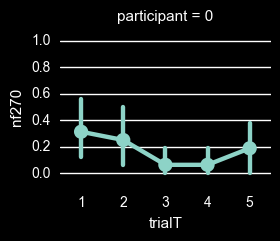

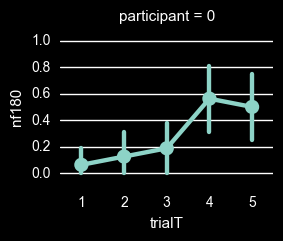

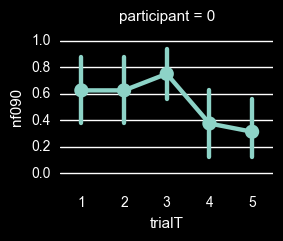

In [9]:
g = sns.factorplot(x='trialT', y='nf270', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf180', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='nf090', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

### Stimulus size for slow/fast/patchy trials

(-0.1, 1.1)

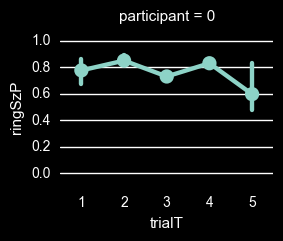

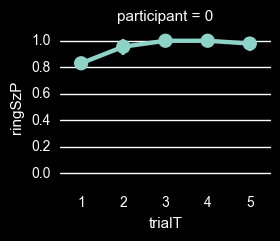

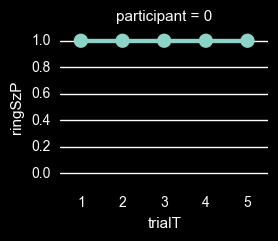

In [10]:
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf270==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf180==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='trialT', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf090==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)